# Fashion MNIST Classification

## Importing Libraries

In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Importing Dataset

In [16]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 

## Understanding the Data

As on the dataset repository, Fashion-MNIST is a dataset of Zalando's article images — consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

Each training and test example is assigned to one of the following labels:

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

## Exploratory Data Analysis 

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

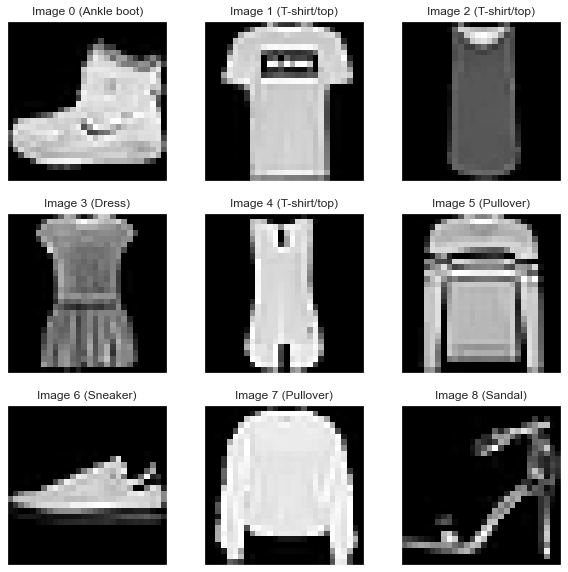

In [18]:
_, axes = plt.subplots(3, 3, figsize=(10, 10))

img_count = 0
for row in axes:
    for ax in row:
        ax.set(title=f'Image {img_count} ({class_names[y_train[img_count]]})')
        ax.title.set_size(12)

        ax.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

        ax.grid(False)

        ax.imshow(X_train[img_count], cmap='gray')
        img_count += 1

plt.show()


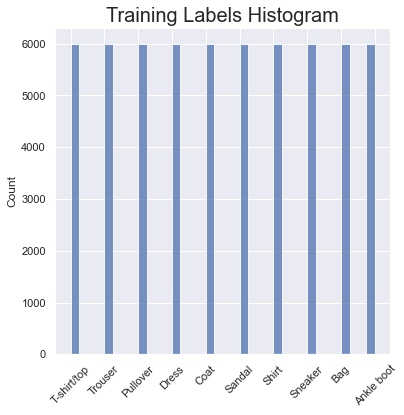

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.histplot(y_train, ax=ax)

_ = plt.xticks([i for i in range(0, len(class_names))] , class_names)
ax.tick_params(axis='x', rotation=45)

_ = plt.title('Training Labels Histogram', size=20)

## Preprocessing 

In [20]:
# normalize data
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

## Create Model

In [21]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


### Traing Model

In [22]:
history = model.fit(X_train_norm, y_train,
                    validation_data=(X_test_norm, y_test),
                    epochs = 10,
                    verbose = 0)

### Plot Model Performance

Last loss: 0.3731737434864044
Last acc: 0.8662499785423279


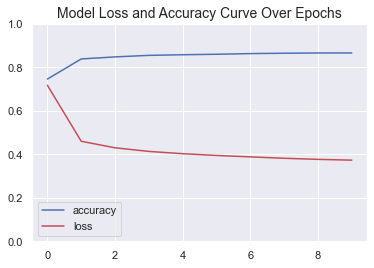

In [23]:
plt.title('Model Loss and Accuracy Curve Over Epochs', size = 14)
plt.plot(history.epoch, history.history['accuracy'], c='b', label='accuracy')
plt.plot(history.epoch, history.history['loss'], c='r', label='loss')
plt.ylim((0, 1))
plt.legend()

print('Last loss: {}'.format(history.history['loss'][-1]))
print('Last acc: {}'.format(history.history['accuracy'][-1]))

## improve Model

### Find Ideal Learning Rate

In [24]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


LearnRateSchedulerCB = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history = model.fit(X_train_norm, y_train,
                    validation_data=(X_test_norm, y_test),
                    callbacks=[LearnRateSchedulerCB],
                    epochs = 40,
                    verbose = 0)

### Plot New Trained Model Performance

Text(0, 0.5, 'Loss')

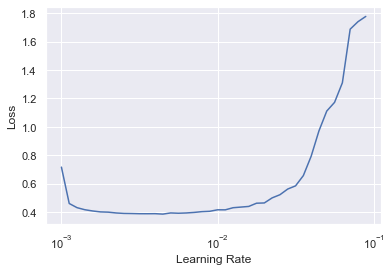

In [25]:
lrs = 1e-3 * (10**(tf.range(40)/20))

plt.close()
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

Accourding to this graph we can say that ```0.003``` seems to be a good learning rate for the current model.

### Finding an Ideal Number of Epochs

In [27]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])


earlyStopCB = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(X_train_norm, y_train,
                    validation_data=(X_test_norm, y_test),
                    callbacks=[earlyStopCB],
                    epochs = 100,
                    verbose = 0)

### Plot New Trained Model Performance

Last loss: 0.2907237708568573
Last acc: 0.8929499983787537


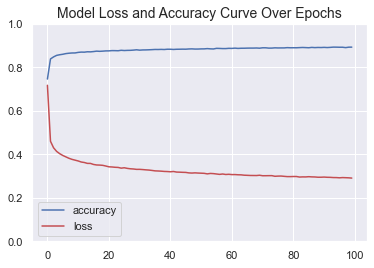

In [28]:
plt.title('Model Loss and Accuracy Curve Over Epochs', size = 14)
plt.plot(history.epoch, history.history['accuracy'], c='b', label='accuracy')
plt.plot(history.epoch, history.history['loss'], c='r', label='loss')
plt.ylim((0, 1))
plt.legend()

print('Last loss: {}'.format(history.history['loss'][-1]))
print('Last acc: {}'.format(history.history['accuracy'][-1]))

From this graph we can say that ```100``` seems to be a good number of epochs to run the model and avoid over-fitting.

## Fitting the Model With the Found Hiper-Parameters

In [29]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28), name='Input_layer'),
    tf.keras.layers.Flatten(name = 'Flatten'),
    tf.keras.layers.Dense(10, activation='relu', name = 'Fist_hidden_layer'),
    tf.keras.layers.Dense(10, activation='relu', name = 'Second_hidden_layer'),
    tf.keras.layers.Dense(10, activation='softmax', name = 'Output_layer')
], name = 'Fashion_MNIST_Classification_Model')

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])


history = model.fit(X_train_norm, y_train,
                    validation_data=(X_test_norm, y_test),
                    epochs = 100,
                    verbose = 0)


plt.title('Model Loss and Accuracy Curve Over Epochs', size = 14)
plt.plot(history.epoch, history.history['accuracy'], c='b', label='accuracy')
plt.plot(history.epoch, history.history['loss'], c='r', label='loss')
plt.ylim((0, 1))
plt.legend()

print('Last loss: {}'.format(history.history['loss'][-1]))
print('Last acc: {}'.format(history.history['accuracy'][-1]))

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, expand_nested=True, show_shapes=True)

## Using the Model to Make Predictions

In [ ]:
y_prob = model.predict(X_test_norm)

print(y_prob[:10])

In [ ]:
y_pred = y_prob.argmax(axis=1)

print(y_pred[:10])

## Mesuring the Model Performance With a Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(true_labels, predicted_labels, classes=False, figsize=(10, 10)):
    
    cm = confusion_matrix(true_labels, predicted_labels)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    ax.matshow(cm, cmap=plt.cm.Blues)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.grid(False)
    ax.set(title='Confusion Matrix',
            xlabel='Predicted Labels',
            ylabel='True Labels',
            xticks=np.arange(n_classes),
            yticks=np.arange(n_classes),
            xticklabels=labels,
            yticklabels=labels)

    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.title.set_size(30)


    threshold = (cm.max() + cm.min()) / 2. 

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment='center',
                color='white' if cm[i, j] > threshold else 'black',
                size=15)


plot_confusion_matrix(y_test, y_pred, class_names, (15, 15))